# Wie nutzt man While-Schleifen?
## Daten laden

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
feature = np.array([[37.92655435, 23.90101111],
                    [35.88942857, 22.73639281],
                    [29.49674574, 21.42168559],
                    [32.48016326, 21.7340484 ],
                    [38.00676226, 24.37202837],
                    [30.73073988, 22.69832608],
                    [35.93672343, 21.07445241],
                    [38.65212459, 20.57099727],
                    [35.52041768, 21.74519457],
                    [37.69535497, 20.33073640],
                    [33.00699292, 22.57063861],
                    [33.73140934, 23.81730782],
                    [43.85053380, 20.05153803],
                    [32.95555986, 24.12153986],
                    [36.38192916, 19.20280266],
                    [36.54270168, 20.45388966],
                    [33.08246118, 22.20524015],
                    [31.76866280, 21.01201139],
                    [42.24260825, 20.44394610],
                    [29.04450264, 22.46633771],
                    [30.04284328, 21.54561621],
                    [18.95626707, 19.66737753],
                    [18.60176718, 17.74023009],
                    [12.85314993, 18.42746953],
                    [28.62450072, 17.94781944],
                    [21.00655655, 19.33438286],
                    [17.33580556, 18.81696459],
                    [31.17129195, 17.23625014],
                    [19.36176482, 20.67772798],
                    [27.26581705, 16.71312863],
                    [21.19107828, 19.00673617],
                    [19.08131597, 15.24401994],
                    [26.69761925, 17.05937466],
                    [4.44136559 , 3.52432493 ],
                    [10.26395607, 1.07729281 ],
                    [7.39058439 , 3.44234423 ],
                    [4.23565118 , 4.28840232 ],
                    [3.87875761 , 5.12407692 ],
                    [15.12959925, 6.26045879 ],
                    [5.93041263 , 1.70841905 ],
                    [4.25054779 , 5.01371294 ],
                    [2.15139117 , 4.16668657 ],
                    [2.38283228 , 3.83347914 ]])

feature = np.concatenate((feature, np.ones(43).reshape(43,1)), axis=1)
print(feature[0:3,:])

[[37.92655435 23.90101111  1.        ]
 [35.88942857 22.73639281  1.        ]
 [29.49674574 21.42168559  1.        ]]


In [3]:
labels = np.concatenate((np.ones(21), np.zeros(22)))
print(labels.shape)

(43,)


## Funktionen Definieren

In [4]:
def visualize(feature, labels, w, x=None, w_old=None): 
    # Hier werden x und w_old als None definiert, sodass man sie beim Aufrufen nicht 
    # unbedingt angeben muss. Sie könnten auch als [1,2,3,4] o.Ä. definiert werden, 
    # aber None macht es einfacher für die if-Statements

    fig, ax = plt.subplots()
    plt.title('Trainingsdaten')
    plt.xlabel('Grösse [cm]')
    plt.ylabel('Länge [cm]')
    plt.scatter(feature[:,0], feature[:,1], c=labels)

    # Linie
    x0 = np.array([min(feature[:,1]), max(feature[:,0])])
    if w[1] != 0:
        x1 = -(w[0] * x0 + w[2]) / w[1]
        plt.plot(x0, x1, label='Gewichte')
        if w[1] > 0:
            ax.fill_between(x0, x1, x1+1, alpha=0.2,label='Hund')
        else:
            ax.fill_between(x0, x1, x1-1, alpha=0.2,label='Hund')

    if x is not None:
        plt.scatter(x[0], x[1],c='r',marker='x',label='Falsch klass.')
    
    if w_old is not None and w_old[1] != 0:
        x1_new = -(w_old[0] * x0 + w_old[2]) / w_old[1]
        plt.plot(x0, x1_new, 'r',label='Alten Gewichte')
        if w_old[1] > 0:
            ax.fill_between(x0, x1_new, x1_new+1, alpha=0.2)
        else:
            ax.fill_between(x0, x1_new, x1_new-1, alpha=0.2)

    ax.set_facecolor('#F6F6F6')
    fig.patch.set_facecolor('#F6F6F6')

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

In [5]:
def perzeptron(w, x):
    if np.dot(w, x) > 0:
        return 1.0
    else:
        return 0.0

## Training

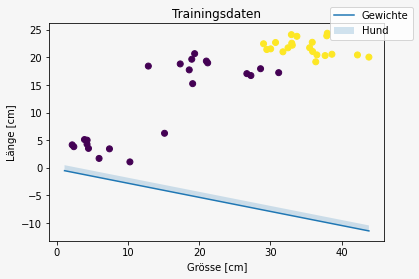

In [6]:
# gewichte zufällig initialsieren
np.random.seed(5) # damit die 'zufälligen' Zahlen immer gleich sind
w = np.random.rand(feature.shape[1])

visualize(feature, labels, w)

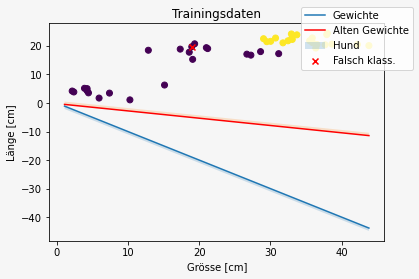

Es wurden 1 Datenpunkt(e) falsch klassifiziert.


In [7]:
fehler = 0
for x, label in zip(feature, labels):
    delta = label - perzeptron(w, x)
    w_old = w.copy()
    w += (delta * x)
    if delta != 0: # falsch klassifiziert
        fehler += 1
        visualize(feature, labels, w, x, w_old)

print("Es wurden " + str(fehler) + " Datenpunkt(e) falsch klassifiziert.")

# Genauso geht: 
# print("Es wurden {} Datenpunkt(e) falsch klassifiziert.".format(fehler))

## While-Schleifen

In [8]:
iter = 0
while iter < 100:
    iter += 1
    if iter > 90:
        break
    elif iter > 20:
        continue
else:
    print("Alle Iterationen wurden durchgeführt")

In [9]:
iter = 0
while iter < 100:
    if perzeptron(w, x) == 1:
        print("Die Schleife wurde abgebrochen.")
        break
    iter += 1
else:
    print("Alle Iterationen wurden durchgeführt")

Alle Iterationen wurden durchgeführt


### Perzeptron Lernregel

In [10]:
np.random.seed(5) # w zurücksetzen
w = np.random.rand(feature.shape[1])

In [11]:
iter = 0
max_epochs = 100
fehler = np.zeros(max_epochs)

while iter < max_epochs:
    for x, label in zip(feature, labels):
        delta = label - perzeptron(w, x)
        w += (delta * x)
        if delta != 0:
            fehler[iter] += 1
    
    if fehler[iter] == 0:
        visualize(feature, labels, w)
        break

    iter += 1
else:
    print("Es wurde keine Lösung gefunden.")

Es wurde keine Lösung gefunden.


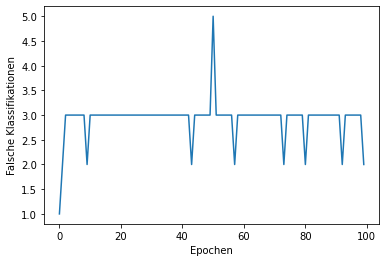

In [12]:
plt.plot(range(max_epochs), fehler)
plt.xlabel('Epochen')
plt.ylabel('Falsche Klassifikationen')
plt.show()

In [13]:
# Als For-Schleife
iter = 0
fehler = True

for iter in range(100):
    for x, label in zip(feature, labels):
        delta = label - perzeptron(w, x)
        w += (delta * x)
        if delta != 0:
            fehler = False

    if not fehler:
        break
else:
    print("Es wurde keine Lösung gefunden.")

### Daten normalisieren

In [14]:
skalierungsfaktor = np.max(feature, 0)
feature /= skalierungsfaktor

In [15]:
np.random.seed(5) # w zurücksetzen
w = np.random.rand(feature.shape[1])

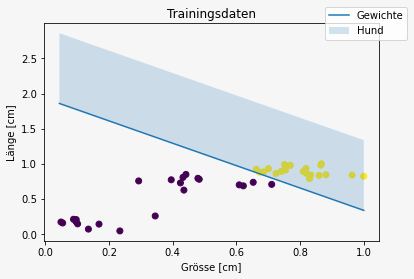

In [16]:
iter = 0
max_epochs = 100
fehler = np.zeros(max_epochs)

# training
while iter < max_epochs:
    for x, label in zip(feature, labels):
        delta = label - perzeptron(w, x)
        if delta != 0: # falsch klassifiziert
            fehler[iter] += 1
            w_old = w.copy()
            w += (delta * x)
    
    if fehler[iter] == 0:
        visualize(feature, labels, w)
        break

    iter += 1
else:
    print("Es wurde keine Lösung gefunden.")

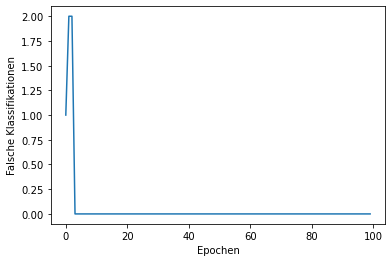

In [17]:
plt.plot(range(max_epochs), fehler)
plt.xlabel('Epochen')
plt.ylabel('Falsche Klassifikationen')
plt.show()

## Aufgabe
### Datensatz erstellen

In [18]:
# parameter
sigma = 0.7
num_dogs = 26
num_cats = 53


In [19]:
# create random data
X1 = sigma * np.random.randn(num_dogs,2) + (3.3, 4.42)
X2 = sigma * np.random.randn(num_cats,2) + (1.4, 2.82)
feature = np.concatenate((X1, X2))
labels = np.concatenate((np.ones(num_dogs), np.zeros(num_cats)))

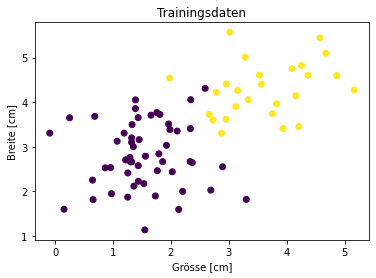

In [20]:
plt.scatter(feature[:,0], feature[:,1], c=labels)
plt.xlabel('Grösse [cm]')
plt.ylabel('Breite [cm]')
plt.title('Trainingsdaten')
plt.show()